<a href="https://colab.research.google.com/github/Ch-Vignesh/AI-TRIP-PLANNER/blob/master/AINLPAssignment001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXP - 1,2



PART A: PLAY TENNIS DATASET
'play_tennis.csv' loaded successfully.
  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes

--- Training Decision Tree (Play Tennis) ---
Training Complete.

📊 Performance Metrics for Decision Tree (Play Tennis):
Accuracy:  0.6000
Precision: 0.6000
Recall:    0.6000
F1 Score:  0.6000
------------------------------
Confusion Matrix:
[[1 1]
 [1 2]]


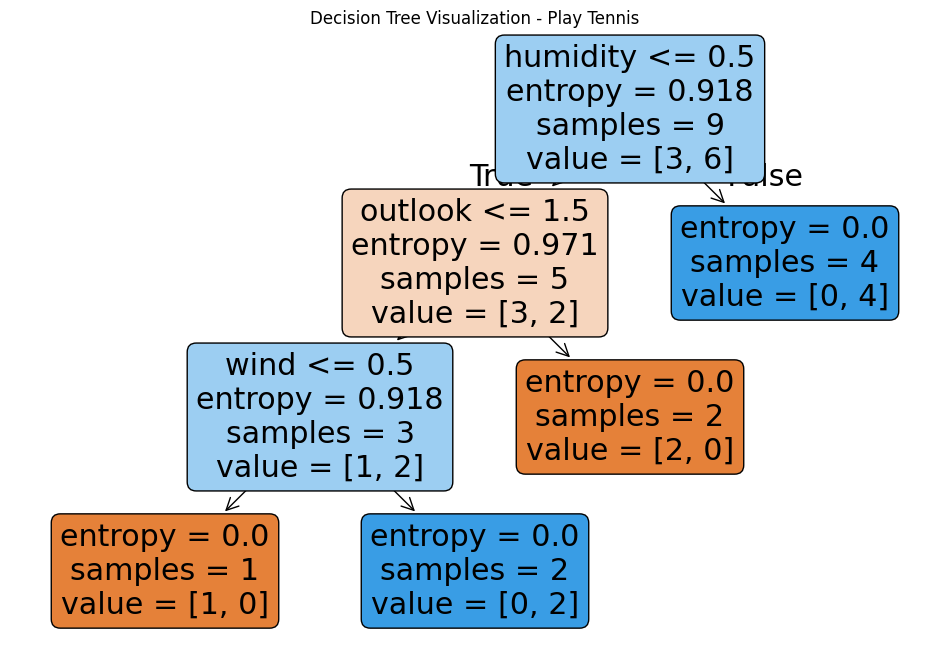


--- Training Naive Bayes (Play Tennis) ---
Training Complete.

📊 Performance Metrics for Naive Bayes (Play Tennis):
Accuracy:  0.6000
Precision: 0.6000
Recall:    0.6000
F1 Score:  0.6000
------------------------------
Confusion Matrix:
[[1 1]
 [1 2]]

Classifying new sample (Encoded indices [2, 0, 0, 0])...
New Sample Prediction (dt): 0

PART B: BREAST CANCER DATASET
Breast Cancer dataset loaded successfully.
Generator Check - First batch shape: (2, 31)

--- Training Decision Tree (Breast Cancer) ---
Training Complete.

📊 Performance Metrics for Decision Tree (Breast Cancer):
Accuracy:  0.9474
Precision: 0.9488
Recall:    0.9474
F1 Score:  0.9468
------------------------------
Confusion Matrix:
[[38  5]
 [ 1 70]]

--- Training Naive Bayes (Breast Cancer) ---
Training Complete.

📊 Performance Metrics for Naive Bayes (Breast Cancer):
Accuracy:  0.9737
Precision: 0.9748
Recall:    0.9737
F1 Score:  0.9735
------------------------------
Confusion Matrix:
[[40  3]
 [ 0 71]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


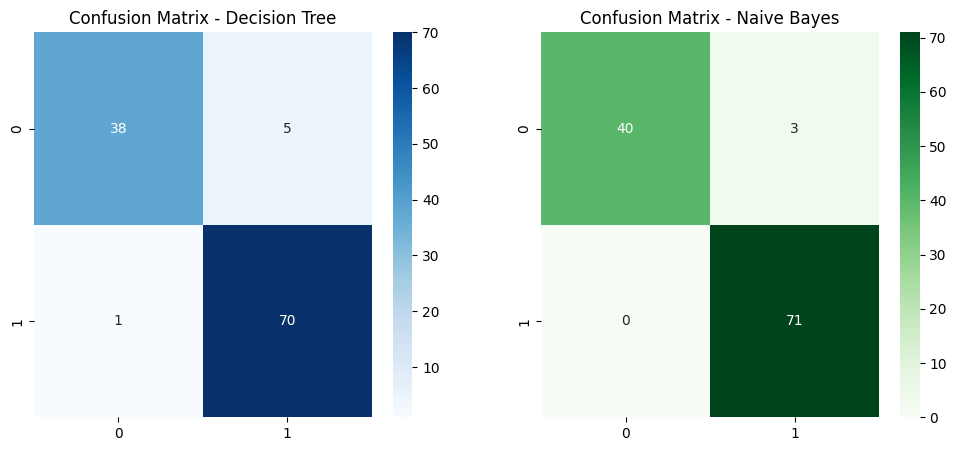

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
import io

# DATASET PREPARATION

def load_breast_cancer_data():
    """
    Loads Breast Cancer dataset.
    In a real scenario with the curl command, you would use pd.read_csv('filename.csv').
    Here we use sklearn's built-in loader which is identical to the UCI/Kaggle source.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    print("Breast Cancer dataset loaded successfully.")
    return df

# CLASS DEFINITION

class ClassifierManager:
    """
    A class to handle training, prediction, and evaluation of classifiers.
    """
    def __init__(self, name, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.name = name
        self.results = {} # Dictionary to store results

    def train_decision_tree(self, criterion='entropy'):
        print(f"\n--- Training Decision Tree ({self.name}) ---")
        # criterion='entropy' mimics the ID3 algorithm behavior
        self.dt_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        self.dt_model.fit(self.X_train, self.y_train)
        print("Training Complete.")

    def train_naive_bayes(self, is_categorical=False):
        print(f"\n--- Training Naive Bayes ({self.name}) ---")
        if is_categorical:
            self.nb_model = CategoricalNB()
        else:
            self.nb_model = GaussianNB()

        self.nb_model.fit(self.X_train, self.y_train)
        print("Training Complete.")

    def evaluate_model(self, model_type='dt'):
        """
        Calculates Confusion Matrix, Accuracy, Precision, Recall, F1 Score.
        """
        if model_type == 'dt':
            model = self.dt_model
            title = "Decision Tree"
        else:
            model = self.nb_model
            title = "Naive Bayes"

        y_pred = model.predict(self.X_test)

        # Metrics
        acc = accuracy_score(self.y_test, y_pred)
        prec = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)
        cm = confusion_matrix(self.y_test, y_pred)

        print(f"\n📊 Performance Metrics for {title} ({self.name}):")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print("-" * 30)
        print("Confusion Matrix:")
        print(cm)

        return cm

    def predict_new_sample(self, sample, model_type='dt'):
        """
        Classifies a new sample.
        """
        model = self.dt_model if model_type == 'dt' else self.nb_model
        prediction = model.predict([sample])
        print(f"New Sample Prediction ({model_type}): {prediction[0]}")
        return prediction[0]

    def visualize_tree(self):
        """Visualizes the Decision Tree"""
        plt.figure(figsize=(12,8))
        plot_tree(self.dt_model, filled=True, rounded=True,
                  feature_names=self.X_train.columns if hasattr(self.X_train, 'columns') else None)
        plt.title(f"Decision Tree Visualization - {self.name}")
        plt.show()

# UTILITY FUNCTIONS & GENERATORS

def data_generator(df, batch_size=5):
    """
    A generator function to yield data in chunks (Prerequisite demonstration).
    """
    for i in range(0, len(df), batch_size):
        yield df.iloc[i:i+batch_size]

# MAIN EXECUTION BLOCK
if __name__ == "__main__":

    # --- PART A: PLAY TENNIS DATASET (Categorical) ---
    print("\n" + "="*40)
    print("PART A: PLAY TENNIS DATASET")
    print("="*40)

    # Load
    df_tennis = pd.read_csv('play_tennis.csv')
    print("'play_tennis.csv' loaded successfully.")
    print(df_tennis.head())

    # 2. Preprocessing (Label Encoding for Scikit-Learn)
    # Scikit-learn Decision Trees do not accept strings properly, they need numbers.
    le = LabelEncoder()
    df_tennis_encoded = df_tennis.copy()

    encoders = {} # Dictionary to store encoders for inverse transform later
    for col in df_tennis_encoded.columns:
        df_tennis_encoded[col] = le.fit_transform(df_tennis_encoded[col])
        encoders[col] = le # Storing the last used encoder (simplified)

    # Split Features and Target
    X_tennis = df_tennis_encoded.drop(['day', 'play'], axis=1) # Drop ID column 'day' AND target column 'play'
    y_tennis = df_tennis_encoded['play'] # Assign target column 'play'

    # Split Train/Test
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tennis, y_tennis, test_size=0.3, random_state=42)

    # 3. Initialize Manager
    tennis_manager = ClassifierManager("Play Tennis", X_train_t, X_test_t, y_train_t, y_test_t)

    # 4. Decision Tree
    tennis_manager.train_decision_tree(criterion='entropy') # Entropy for ID3 style
    tennis_manager.evaluate_model('dt')
    tennis_manager.visualize_tree()

    # 5. Naive Bayes
    tennis_manager.train_naive_bayes(is_categorical=True) # Use CategoricalNB for discrete features
    tennis_manager.evaluate_model('nb')

    # 6. Predict New Sample
    # Sample: Outlook=Sunny(2), Temp=Cool(0), Humidity=High(0), Wind=Strong(0) -> Mapped values depend on LE
    # Note: In real code, use the actual encoder to transform inputs.
    # Here we use a dummy array for demonstration.
    new_sample_tennis = [2, 0, 0, 0]
    print(f"\nClassifying new sample (Encoded indices {new_sample_tennis})...")
    tennis_manager.predict_new_sample(new_sample_tennis, 'dt')


    # --- PART B: BREAST CANCER DATASET (Numerical) ---
    print("\n" + "="*40)
    print("PART B: BREAST CANCER DATASET")
    print("="*40)

    # 1. Load Data
    df_cancer = load_breast_cancer_data()

    # Demonstrate Generator
    gen = data_generator(df_cancer, batch_size=2)
    print(f"Generator Check - First batch shape: {next(gen).shape}")

    # 2. Split
    X_cancer = df_cancer.drop('target', axis=1)
    y_cancer = df_cancer['target']

    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

    # 3. Initialize Manager
    cancer_manager = ClassifierManager("Breast Cancer", X_train_c, X_test_c, y_train_c, y_test_c)

    # 4. Decision Tree
    cancer_manager.train_decision_tree()
    cm_dt = cancer_manager.evaluate_model('dt')

    # 5. Naive Bayes
    cancer_manager.train_naive_bayes(is_categorical=False) # GaussianNB for continuous features
    cm_nb = cancer_manager.evaluate_model('nb')

    # 6. Heatmap Visualization for Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix - Decision Tree')

    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', ax=ax[1])
    ax[1].set_title('Confusion Matrix - Naive Bayes')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 003

In [26]:
"""
Assignment 3: Naive Bayes Text Classification
Target: Google Colab / Jupyter

Requirements:
- Create folder with 20 reviews.
- Use os.walk to iterate.
- Train Naive Bayes.
- Calculate Accuracy, Precision, Recall.
"""

import os
import shutil
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def create_dataset():
    """
    Creates a dummy folder structure with 20 restaurant reviews.
    Structure:
    dataset/
      train/
        pos/ (10 files)
        neg/ (10 files)
      test/
        pos/ (2 files)
        neg/ (2 files)
    """
    base_dir = "restaurant_reviews"

    # Clean up if exists
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)

    # Define Data
    train_pos = [
        "The food was delicious and fresh.",
        "Amazing service and great atmosphere.",
        "Best pizza in town, highly recommended!",
        "Staff was very friendly and attentive.",
        "Loved the pasta, will come again.",
        "A delightful culinary experience.",
        "Tasty burgers and crispy fries.",
        "The dessert menu is to die for.",
        "Quick service and reasonable prices.",
        "Absolutely fantastic dinner."
    ]

    train_neg = [
        "The food was cold and bland.",
        "Terrible service, very rude waiter.",
        "Waited an hour for our table.",
        "The steak was overcooked and tough.",
        "Dirty tables and noisy environment.",
        "Way too expensive for the quality.",
        "Found a hair in my soup. Disgusting.",
        "The drinks were watered down.",
        "Never coming back to this place.",
        "Worst dining experience ever."
    ]

    test_pos = ["Great lunch spot, very tasty.", "Excellent service provided today."]
    test_neg = ["The chicken was raw.", "Slow service and bad food."]

    # Helper to write files
    def write_files(path, texts, prefix):
        os.makedirs(path, exist_ok=True)
        for i, text in enumerate(texts):
            filename = f"{path}/{prefix}_{i+1}.txt"
            with open(filename, 'w') as f:
                f.write(text)

    # Create Directories and Write Files
    write_files(f"{base_dir}/train/pos", train_pos, "pos")
    write_files(f"{base_dir}/train/neg", train_neg, "neg")
    write_files(f"{base_dir}/test/pos", test_pos, "pos")
    write_files(f"{base_dir}/test/neg", test_neg, "neg")

    print(f"Dataset created in folder '{base_dir}'")
    return base_dir

# 2. LOAD DATA USING os.walk
def load_data_from_folder(root_folder):
    """
    Iterates through folders using os.walk to read text files.
    Assumes subfolders 'pos' and 'neg' indicate labels.
    """
    documents = []
    labels = []

    print(f"Scanning {root_folder}...")

    # os.walk yields (current_path, directories, files)
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.endswith(".txt"):
                file_path = os.path.join(dirpath, filename)

                # Determine label from folder name
                # If file is in .../pos/, label is 1. If .../neg/, label is 0
                if 'pos' in os.path.basename(dirpath):
                    label = 1
                elif 'neg' in os.path.basename(dirpath):
                    label = 0
                else:
                    continue

                # Read content
                with open(file_path, 'r') as f:
                    content = f.read()
                    documents.append(content)
                    labels.append(label)

    return documents, labels

# 3. MAIN EXECUTION

# A. Create Data
data_folder = create_dataset()

# B. Load Training Data
train_docs, train_labels = load_data_from_folder(os.path.join(data_folder, "train"))
print(f"Loaded {len(train_docs)} training documents.")

# C. Load Test Data
test_docs, test_labels = load_data_from_folder(os.path.join(data_folder, "test"))
print(f"Loaded {len(test_docs)} testing documents.")

# D. Vectorization (Convert text to numbers)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_docs)
X_test = vectorizer.transform(test_docs)

# E. Train Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, train_labels)
print(" Model Trained.")

# F. Predictions
y_pred = clf.predict(X_test)

# G. Metrics
print("\n" + "="*30)
print("📊 CLASSIFICATION RESULTS")
print("="*30)
print(f"Accuracy:  {accuracy_score(test_labels, y_pred):.2f}")
print(f"Precision: {precision_score(test_labels, y_pred):.2f}")
print(f"Recall:    {recall_score(test_labels, y_pred):.2f}")
print("-" * 30)
print("Detailed Report:")
print(classification_report(test_labels, y_pred, target_names=['Negative', 'Positive']))

# H. Test with a custom sentence
new_review = ["The food was okay but service was slow"]
new_vec = vectorizer.transform(new_review)
prediction = clf.predict(new_vec)
print(f"\nCustom Test: '{new_review[0]}'")
print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")

Dataset created in folder 'restaurant_reviews'
Scanning restaurant_reviews/train...
Loaded 20 training documents.
Scanning restaurant_reviews/test...
Loaded 4 testing documents.
 Model Trained.

📊 CLASSIFICATION RESULTS
Accuracy:  0.75
Precision: 0.67
Recall:    1.00
------------------------------
Detailed Report:
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Custom Test: 'The food was okay but service was slow'
Prediction: Positive


004


In [12]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 24.4 MB/s eta 0:00:00


First 5 rows of Discretized Data:
     age      chol trestbps  target
0    Old      High     High       0
1    Old  VeryHigh     High       1
2    Old      High   Normal       1
3  Young  VeryHigh   PreHyp       0
4  Young      High   PreHyp       0

Training Bayesian Network...
Model Trained successfully.

PATIENT DIAGNOSIS SIMULATION

Patient 1 Evidence: {'age': 'Old', 'sex': 1, 'chol': 'VeryHigh', 'cp': 3}
Probability of Heart Disease (Target):
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1250 |
+-----------+---------------+
| target(1) |        0.8750 |
+-----------+---------------+

Patient 2 Evidence: {'age': 'Young', 'sex': 0, 'chol': 'Normal', 'cp': 0}
Probability of Heart Disease (Target):
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+


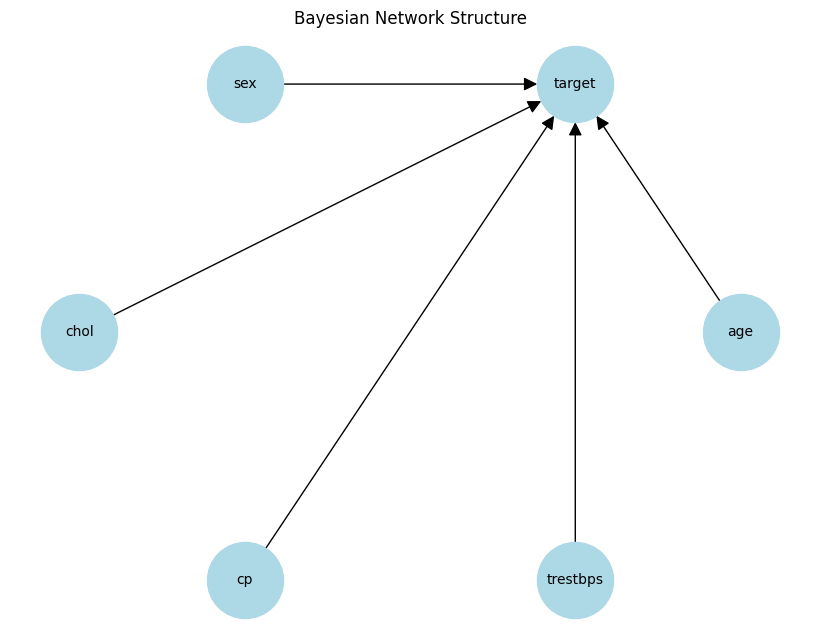

In [27]:
"""
Assignment 4: Bayesian Network for Heart Disease Diagnosis
Target: Google Colab / Jupyter
"""

import pandas as pd
import numpy as np
import io
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

# 1. DATA PREPARATION

def load_heart_data():
    """
    Loads the heart disease dataset.
    Recreating the CSV based on user input for standalone execution.
    """
    csv_data = """age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
62,0,0,140,268,0,0,160,0,3.6,0,2,2,1
57,0,1,120,354,0,1,163,1,0.6,2,0,2,0
63,1,3,130,254,0,0,147,0,1.4,1,1,3,1
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
"""
    # In a real scenario: df = pd.read_csv("Heart_disease_cleveland_new.csv")
    df = pd.read_csv(io.StringIO(csv_data))
    return df

def discretize_data(df):
    """
    Bayesian Networks work best with discrete data states.
    We must bin continuous variables (Age, Chol, etc.) into categories.
    """
    df_binned = df.copy()

    # Binning Age: Young (<45), Middle (45-60), Old (>60)
    df_binned['age'] = pd.cut(df['age'], bins=[0, 45, 60, 100], labels=['Young', 'Middle', 'Old'])

    # Binning Cholesterol: Normal (<200), High (200-239), Very High (>240)
    df_binned['chol'] = pd.cut(df['chol'], bins=[0, 200, 239, 600], labels=['Normal', 'High', 'VeryHigh'])

    # Binning Blood Pressure (trestbps): Normal (<120), Prehypertension (120-139), High (>140)
    df_binned['trestbps'] = pd.cut(df['trestbps'], bins=[0, 120, 139, 300], labels=['Normal', 'PreHyp', 'High'])

    # Binning Max Heart Rate (thalach)
    df_binned['thalach'] = pd.cut(df['thalach'], bins=[0, 150, 220], labels=['Low', 'High'])

    # Discretizing Oldpeak (ST depression)
    df_binned['oldpeak'] = pd.cut(df['oldpeak'], bins=[-1, 1, 10], labels=['Low', 'High'])

    return df_binned

# 2. CONSTRUCT BAYESIAN NETWORK

# Load and process
df = load_heart_data()
df_model = discretize_data(df)

print("First 5 rows of Discretized Data:")
print(df_model[['age', 'chol', 'trestbps', 'target']].head())

# Define Structure
# Diagnosis depends on Age, Sex, Cholesterol, CP, etc.
# We define a structure where the 'target' (Disease) is dependent on symptoms,
# or conversely, symptoms are dependent on the disease.
# For standard diagnosis, we often model: Features -> Target, or Target -> Features (Naive Bayes structure).
# Here we define a custom DAG (Directed Acyclic Graph).
model = DiscreteBayesianNetwork([
    ('age', 'target'),
    ('sex', 'target'),
    ('chol', 'target'),
    ('cp', 'target'),
    ('trestbps', 'target')
])

# 3. TRAIN MODEL (Learn Probabilities)
print("\nTraining Bayesian Network...")
model.fit(df_model, estimator=MaximumLikelihoodEstimator)
print("Model Trained successfully.")

# 4. INFERENCE (DIAGNOSIS)

infer = VariableElimination(model)

print("\n" + "="*40)
print("PATIENT DIAGNOSIS SIMULATION")
print("="*40)

# Case 1: High Cholesterol, Old, Chest Pain Type 3 (Asymptomatic)
evidence_1 = {
    'age': 'Old',
    'sex': 1,
    'chol': 'VeryHigh',
    'cp': 3
}

print(f"\nPatient 1 Evidence: {evidence_1}")
try:
    q1 = infer.query(variables=['target'], evidence=evidence_1)
    print("Probability of Heart Disease (Target):")
    print(q1)
except Exception as e:
    print(f"Error in inference (dataset might be too small to cover this case): {e}")

# Case 2: Young, Normal Cholesterol, Chest Pain Type 0 (Typical Angina)
evidence_2 = {
    'age': 'Young',
    'sex': 0,
    'chol': 'Normal',
    'cp': 0
}

print(f"\nPatient 2 Evidence: {evidence_2}")
try:
    q2 = infer.query(variables=['target'], evidence=evidence_2)
    print("Probability of Heart Disease (Target):")
    print(q2)
except Exception as e:
    print(f"Error in inference: {e}")

# 5. VISUALIZE NETWORK
plt.figure(figsize=(8, 6))
# Provide explicit positions for nodes to avoid drawing issues
pos = nx.circular_layout(model)
nx.draw(model, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()

# 005

✅ 'clustering_data.csv' created successfully.

Data Loaded: 300 samples, 2 features

--- Running k-Means ---
k-Means Silhouette Score: 0.6820

--- Running EM Algorithm (GMM) ---
EM (GMM) Silhouette Score: 0.6820


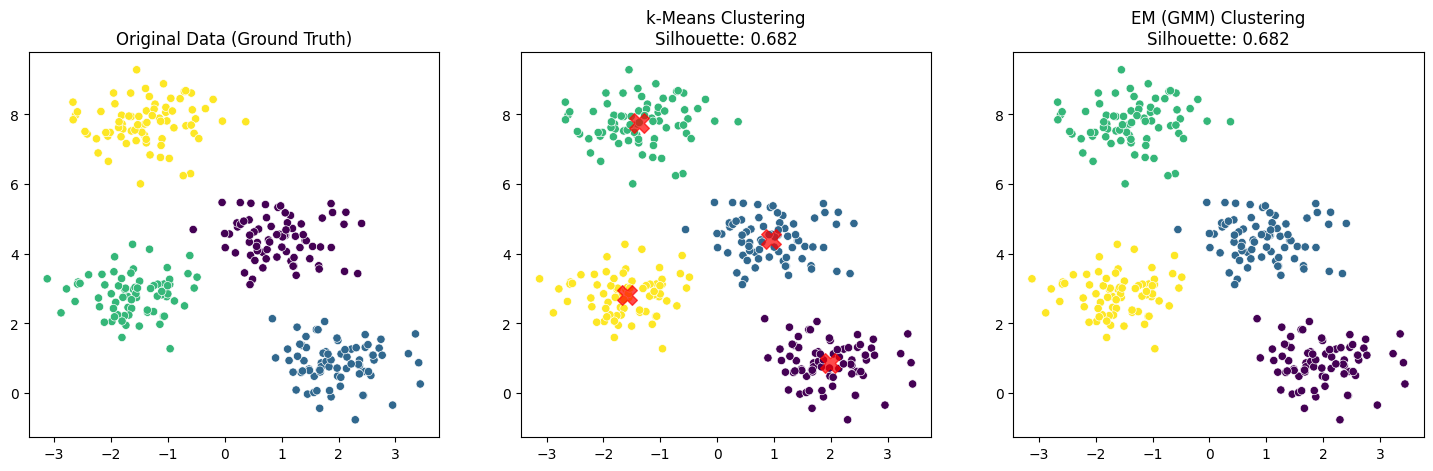


📝 COMPARISON & COMMENTS
1. k-Means assumes clusters are spherical and of similar size.
   It uses hard assignment (a point belongs to exactly one cluster).
   > k-Means Score: 0.6820

2. EM (GMM) assumes clusters are Gaussian distributions.
   It uses soft assignment (probabilities) and can handle elliptical shapes.
   > EM Score: 0.6820

Conclusion: k-Means performed slightly better (likely due to spherical clusters).


In [28]:
"""
Assignment 5: EM Algorithm vs k-Means Clustering
Target: Google Colab / Jupyter

Requirements:
- Apply EM (Gaussian Mixture) and k-Means to a CSV dataset.
- Compare results and comment on quality.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs
import seaborn as sns

# 1. DATA PREPARATION

def create_clustering_csv():
    """
    Generates a synthetic dataset and saves it as a CSV.
    We use make_blobs to create distinct clusters.
    """
    # Generate synthetic data: 300 samples, 4 centers, 2 features for easy plotting
    X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Convert to DataFrame
    df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

    # Save to CSV
    df.to_csv('clustering_data.csv', index=False)
    print("✅ 'clustering_data.csv' created successfully.")
    return y_true # Return ground truth for comparison (optional)

# ==========================================
# 2. ALGORITHM IMPLEMENTATION
# ==========================================

def run_clustering_comparison():
    # 1. Load Data
    y_true = create_clustering_csv() # Get ground truth for reference
    df = pd.read_csv('clustering_data.csv')
    X = df.values

    print(f"\nData Loaded: {X.shape[0]} samples, {X.shape[1]} features")

    # --- A. k-Means Clustering ---
    print("\n--- Running k-Means ---")
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)

    # Calculate Quality (Silhouette Score)
    kmeans_score = silhouette_score(X, kmeans_labels)
    print(f"k-Means Silhouette Score: {kmeans_score:.4f}")

    # --- B. EM Algorithm (Gaussian Mixture Model) ---
    print("\n--- Running EM Algorithm (GMM) ---")
    # GMM uses the Expectation-Maximization algorithm to fit
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm_labels = gmm.fit_predict(X)

    # Calculate Quality
    gmm_score = silhouette_score(X, gmm_labels)
    print(f"EM (GMM) Silhouette Score: {gmm_score:.4f}")

    # ==========================================
    # 3. VISUALIZATION & COMPARISON
    # ==========================================

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot 1: Original Ground Truth (if available)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_true, palette='viridis', ax=axes[0], legend=False)
    axes[0].set_title('Original Data (Ground Truth)')

    # Plot 2: k-Means Results
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_labels, palette='viridis', ax=axes[1], legend=False)
    # Plot Centers
    centers = kmeans.cluster_centers_
    axes[1].scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X')
    axes[1].set_title(f'k-Means Clustering\nSilhouette: {kmeans_score:.3f}')

    # Plot 3: EM (GMM) Results
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=gmm_labels, palette='viridis', ax=axes[2], legend=False)
    axes[2].set_title(f'EM (GMM) Clustering\nSilhouette: {gmm_score:.3f}')

    plt.show()

    # ==========================================
    # 4. COMMENTS ON QUALITY
    # ==========================================
    print("\n" + "="*40)
    print("📝 COMPARISON & COMMENTS")
    print("="*40)
    print("1. k-Means assumes clusters are spherical and of similar size.")
    print("   It uses hard assignment (a point belongs to exactly one cluster).")
    print(f"   > k-Means Score: {kmeans_score:.4f}")
    print("\n2. EM (GMM) assumes clusters are Gaussian distributions.")
    print("   It uses soft assignment (probabilities) and can handle elliptical shapes.")
    print(f"   > EM Score: {gmm_score:.4f}")

    if gmm_score > kmeans_score:
        print("\nConclusion: EM performed better or similar to k-Means on this dataset.")
    else:
        print("\nConclusion: k-Means performed slightly better (likely due to spherical clusters).")

if __name__ == "__main__":
    run_clustering_comparison()

## 006

In [18]:
# -*- coding: utf-8 -*-
"""
Assignment 6: k-Nearest Neighbour (k-NN) on Iris Dataset
Target: Google Colab / Jupyter

Requirements:
- Classify Iris dataset using k-NN.
- Print correct and wrong predictions.
"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def run_knn_iris():
    # ==========================================
    # 1. LOAD DATA
    # ==========================================
    print("Loading Iris Dataset...")
    iris = load_iris()
    X = iris.data
    y = iris.target
    class_names = iris.target_names

    # Create a DataFrame for better visualization of raw data
    df = pd.DataFrame(X, columns=iris.feature_names)
    df['species'] = [class_names[i] for i in y]
    print(f"Data shape: {df.shape}")
    print(df.head())

    # ==========================================
    # 2. SPLIT DATA
    # ==========================================
    # Split 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ==========================================
    # 3. TRAIN k-NN CLASSIFIER
    # ==========================================
    k = 3 # Number of neighbors
    print(f"\nTraining k-NN with k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # ==========================================
    # 4. PREDICTIONS & OUTPUT
    # ==========================================
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {accuracy:.2f}")

    print("\n" + "="*60)
    print(f"{'Sample ID':<10} | {'Actual Class':<15} | {'Predicted Class':<15} | {'Status':<10}")
    print("="*60)

    correct_count = 0
    wrong_count = 0

    # Iterate through test data to print correct/wrong
    for i in range(len(y_test)):
        actual = class_names[y_test[i]]
        predicted = class_names[y_pred[i]]

        if y_test[i] == y_pred[i]:
            status = "✅ Correct"
            correct_count += 1
        else:
            status = "❌ Wrong"
            wrong_count += 1

        print(f"{i:<10} | {actual:<15} | {predicted:<15} | {status:<10}")

    print("="*60)
    print(f"Total Correct: {correct_count}")
    print(f"Total Wrong:   {wrong_count}")

if __name__ == "__main__":
    run_knn_iris()

Loading Iris Dataset...
Data shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Training k-NN with k=3...
Overall Accuracy: 1.00

Sample ID  | Actual Class    | Predicted Class | Status    
0          | versicolor      | versicolor      | ✅ Correct 
1          | setosa          | setosa          | ✅ Correct 
2          | virginica       | virginica       | ✅ Correct 
3          | versicolor      | versicolor      | ✅ Correct 
4          | versicolor      | versicolor      | ✅ Correc

## 007

Data Generated: 100 points.


/tmp/ipython-input-3593992856.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i, i] = np.exp(diff * diff.T / (-2.0 * tau**2))
/tmp/ipython-input-3593992856.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = local_weight_regression(x_plot[i], x_data, y_data, tau)


✅ Plots generated. Note how tau affects the smoothing.


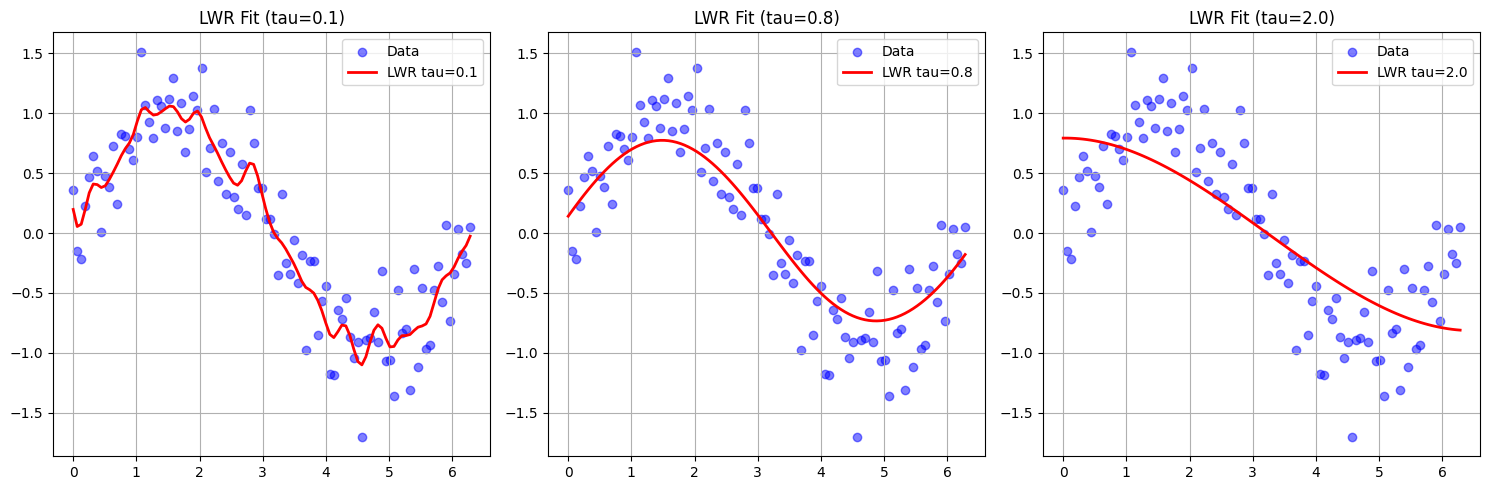

In [21]:
# -*- coding: utf-8 -*-
"""
Assignment 7: Locally Weighted Regression (LWR)
Target: Google Colab / Jupyter

Requirements:
- Implement Non-parametric Locally Weighted Regression.
- Fit data points.
- Draw graphs to visualize the fit.
"""

import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. ALGORITHM IMPLEMENTATION
# ==========================================

def gaussian_kernel(point, x, tau):
    """
    Calculates the weights for a specific query point based on distance.
    tau (bandwidth) controls how quickly weights fall off.
    """
    m = np.shape(x)[0] # Number of training examples
    weights = np.asmatrix(np.eye(m)) # Identity matrix

    for i in range(m):
        # Gaussian formula: exp( - (xi - x)^2 / (2 * tau^2) )
        diff = point - x[i]
        weights[i, i] = np.exp(diff * diff.T / (-2.0 * tau**2))

    return weights

def local_weight_regression(x_input, x_data, y_data, tau):
    """
    Performs the LWR calculation for a single input point.
    Formula: theta = (X.T * W * X)^-1 * (X.T * W * Y)
    """
    weights = gaussian_kernel(x_input, x_data, tau)
    x_transpose = x_data.T

    # Calculate (X^T * W * X)
    xt_w_x = x_transpose * weights * x_data

    # Check if matrix is singular (invertible)
    if np.linalg.det(xt_w_x) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return

    # Calculate Theta
    theta = xt_w_x.I * (x_transpose * weights * y_data)

    # Prediction = x * theta
    return x_input * theta

def run_lwr(x_plot, x_data, y_data, tau):
    """
    Loops through all points we want to plot to get their predictions.
    """
    m = np.shape(x_plot)[0]
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = local_weight_regression(x_plot[i], x_data, y_data, tau)

    return y_pred

# ==========================================
# 2. DATA GENERATION (Synthetic Non-Linear)
# ==========================================

def generate_data():
    """
    Generates a noisy sine wave.
    LWR is great for non-linear data where standard Linear Regression fails.
    """
    n = 100
    # X values from 0 to 2*pi
    x = np.linspace(0, 2 * np.pi, n)
    # Y values = Sin(x) + Random Noise
    y = np.sin(x) + 0.3 * np.random.normal(size=n)

    # Reshape for Matrix operations
    x_mat = np.asmatrix(x).T
    y_mat = np.asmatrix(y).T

    # Add bias term (column of 1s) to X
    # X becomes [1, x_value]
    m = np.shape(x_mat)[0]
    x_augmented = np.hstack((np.ones((m, 1)), x_mat))

    return x, y, x_augmented, y_mat

# ==========================================
# 3. MAIN EXECUTION & PLOTTING
# ==========================================

if __name__ == "__main__":
    # 1. Get Data
    x_raw, y_raw, X_mat, Y_mat = generate_data()

    print(f"Data Generated: {len(x_raw)} points.")

    # 2. Run LWR with different Bandwidths (Tau)
    # Tau controls sensitivity.
    # Low Tau = Overfitting (very wiggly)
    # High Tau = Underfitting (straight line)

    tau_vals = [0.1, 0.8, 2.0]
    plt.figure(figsize=(15, 5))

    for i, tau in enumerate(tau_vals):
        ax = plt.subplot(1, 3, i + 1)

        # Predict
        # We predict on the sorted x_raw points for a smooth line
        predictions = run_lwr(X_mat, X_mat, Y_mat, tau)

        # Plot Scatter (Original Data)
        ax.scatter(x_raw, y_raw, color='blue', alpha=0.5, label='Data')

        # Plot Fit (LWR)
        # Sort X for plotting line correctly
        sort_index = x_raw.argsort()
        ax.plot(x_raw[sort_index], predictions[sort_index], color='red', linewidth=2, label=f'LWR tau={tau}')

        ax.set_title(f'LWR Fit (tau={tau})')
        ax.legend()
        ax.grid(True)

    print("✅ Plots generated. Note how tau affects the smoothing.")
    plt.tight_layout()
    plt.show()

## 008

In [22]:
# -*- coding: utf-8 -*-
"""
Assignment 8: 5-Fold Cross Validation
Target: Google Colab / Jupyter

Requirements:
- Implement 5-fold cross validation.
- Compare Accuracy, Precision, Recall, F-score for different folds.
"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_cross_validation():
    # ==========================================
    # 1. LOAD DATASET
    # ==========================================
    # Using Breast Cancer dataset (Binary Classification)
    # This makes Precision/Recall easier to interpret than multi-class Iris
    data = load_breast_cancer()
    X = data.data
    y = data.target

    print("Dataset: Breast Cancer Wisconsin")
    print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
    print("-" * 40)

    # ==========================================
    # 2. SETUP CROSS VALIDATION
    # ==========================================
    # k=5 folds
    k = 5
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize Model (Naive Bayes used as example)
    model = GaussianNB()

    # Lists to store results
    results = []

    print(f"Starting {k}-Fold Cross Validation...\n")

    # ==========================================
    # 3. ITERATE FOLDS
    # ==========================================
    fold_num = 1

    for train_index, test_index in kf.split(X, y):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store
        results.append({
            'Fold': fold_num,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })

        fold_num += 1

    # ==========================================
    # 4. DISPLAY RESULTS
    # ==========================================
    results_df = pd.DataFrame(results)

    # Formatting for cleaner output
    print(results_df.to_string(index=False, float_format="%.4f"))

    print("-" * 40)
    print("AVERAGE PERFORMANCE:")
    print("-" * 40)
    print(f"Mean Accuracy:  {results_df['Accuracy'].mean():.4f}")
    print(f"Mean Precision: {results_df['Precision'].mean():.4f}")
    print(f"Mean Recall:    {results_df['Recall'].mean():.4f}")
    print(f"Mean F1 Score:  {results_df['F1 Score'].mean():.4f}")

if __name__ == "__main__":
    run_cross_validation()

Dataset: Breast Cancer Wisconsin
Samples: 569, Features: 30
----------------------------------------
Starting 5-Fold Cross Validation...

 Fold  Accuracy  Precision  Recall  F1 Score
    1    0.9649     0.9718  0.9718    0.9718
    2    0.9035     0.8947  0.9577    0.9252
    3    0.9298     0.9000  1.0000    0.9474
    4    0.9298     0.9706  0.9167    0.9429
    5    0.9646     0.9467  1.0000    0.9726
----------------------------------------
AVERAGE PERFORMANCE:
----------------------------------------
Mean Accuracy:  0.9385
Mean Precision: 0.9368
Mean Recall:    0.9692
Mean F1 Score:  0.9520


## 009

Loading CIFAR-10 Dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Original Training Shape: (50000, 32, 32, 3)
Flattened Training Shape: (50000, 3072)

PART I: k-NEAREST NEIGHBOR (KNN)
Subsetting data to first 5000 samples for KNN speed...
Training KNN (k=3)...
Predicting with KNN...
KNN Accuracy (on subset): 0.2610

KNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.27      0.55      0.36       103
  automobile       0.41      0.16      0.23        89
        bird       0.17      0.45      0.25       100
         cat       0.29      0.17      0.22       103
        deer       0.15      0.33      0.21        90
         dog       0.17      0.07      0.10        86
        frog       0.37      0.20      0.26       112
       horse       0.60      0.09      0.15       102
        ship       0.49      0.52      0.50       106
       truck       0.56      0.05      0.08       109

    accuracy                           0.26 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.2612 - loss: 2.0746 - val_accuracy: 0.3455 - val_loss: 1.8238
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.3781 - loss: 1.7301 - val_accuracy: 0.3971 - val_loss: 1.6940
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4176 - loss: 1.6240 - val_accuracy: 0.4171 - val_loss: 1.6464
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.4387 - loss: 1.5640 - val_accuracy: 0.4335 - val_loss: 1.5878
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4601 - loss: 1.5151 - val_accuracy: 0.4493 - val_loss: 1.5581
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4699 - loss: 1.4790 - val_accuracy: 0.4525 - val_loss: 1.5449
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4855 - loss: 1.4364 - val_accuracy: 0.4604 - val_loss: 1.5387
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accura

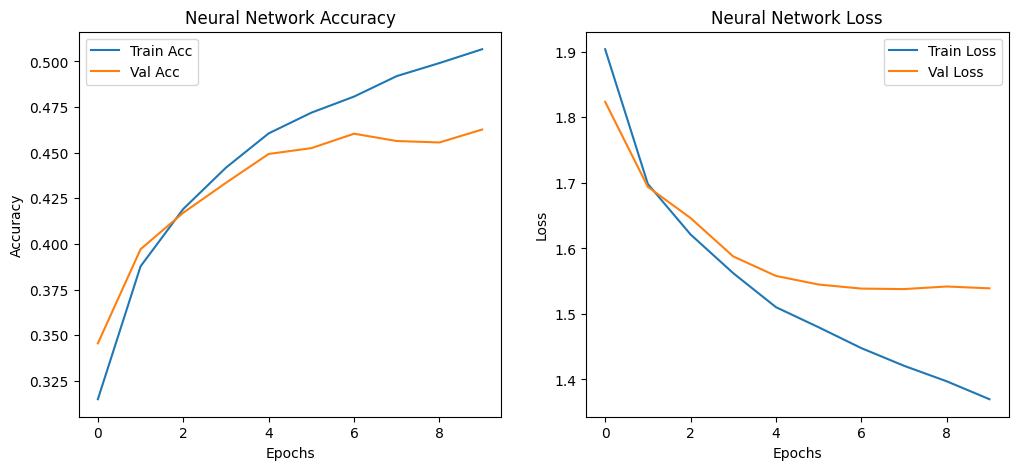

In [23]:
# -*- coding: utf-8 -*-
"""
Assignment 9: CIFAR-10 Classification
Target: Google Colab / Jupyter

Requirements:
(i)  Classify using k-Nearest Neighbors (KNN).
(ii) Classify using a 3-Layer Neural Network (Softmax classifier).
"""

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def run_cifar10_assignment():
    # ==========================================
    # 1. LOAD & PREPROCESS DATA
    # ==========================================
    print("Loading CIFAR-10 Dataset...")
    (X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Normalize pixel values to be between 0 and 1
    X_train_full = X_train_full.astype('float32') / 255.0
    X_test_full = X_test_full.astype('float32') / 255.0

    # Flatten the images for KNN (32x32x3 -> 3072 features)
    X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
    X_test_flat = X_test_full.reshape(X_test_full.shape[0], -1)

    # Flatten y (convert from 2D array to 1D array for sklearn)
    y_train_flat = y_train_full.flatten()
    y_test_flat = y_test_full.flatten()

    print(f"Original Training Shape: {X_train_full.shape}")
    print(f"Flattened Training Shape: {X_train_flat.shape}")

    # ==========================================
    # PART I: k-NEAREST NEIGHBOR (KNN)
    # ==========================================
    print("\n" + "="*40)
    print("PART I: k-NEAREST NEIGHBOR (KNN)")
    print("="*40)

    # NOTE: KNN is very slow on large datasets with high dimensionality.
    # To make this run quickly in Colab, we will use a subset of the data.
    subset_size = 5000
    print(f"Subsetting data to first {subset_size} samples for KNN speed...")

    X_train_sub = X_train_flat[:subset_size]
    y_train_sub = y_train_flat[:subset_size]
    X_test_sub = X_test_flat[:1000] # Test on 1000 samples
    y_test_sub = y_test_flat[:1000]

    # Initialize and Train KNN
    k = 3
    print(f"Training KNN (k={k})...")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_sub, y_train_sub)

    # Predict
    print("Predicting with KNN...")
    y_pred_knn = knn.predict(X_test_sub)

    # Evaluate
    acc_knn = accuracy_score(y_test_sub, y_pred_knn)
    print(f"KNN Accuracy (on subset): {acc_knn:.4f}")
    print("\nKNN Classification Report:")
    print(classification_report(y_test_sub, y_pred_knn, target_names=class_names))


    # ==========================================
    # PART II: 3-LAYER NEURAL NETWORK
    # ==========================================
    print("\n" + "="*40)
    print("PART II: 3-LAYER NEURAL NETWORK")
    print("="*40)

    # One-hot encode targets for Neural Network
    y_train_oh = to_categorical(y_train_full, 10)
    y_test_oh = to_categorical(y_test_full, 10)

    # Build Model (3 Layers: Hidden -> Hidden -> Output)
    model = Sequential([
        Input(shape=(32, 32, 3)),            # Input Layer
        Flatten(),                           # Flatten 2D image to 1D vector
        Dense(512, activation='relu'),       # Layer 1 (Hidden)
        Dense(256, activation='relu'),       # Layer 2 (Hidden)
        Dense(10, activation='softmax')      # Layer 3 (Output/Softmax Classifier)
    ])

    # Compile (Optimizer & Loss)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model Architecture:")
    model.summary()

    # Train
    print("\nTraining Neural Network...")
    history = model.fit(X_train_full, y_train_oh,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

    # Evaluate
    print("\nEvaluating Neural Network on Test Set...")
    test_loss, test_acc = model.evaluate(X_test_full, y_test_oh, verbose=0)
    print(f"Neural Network Accuracy: {test_acc:.4f}")

    # ==========================================
    # VISUALIZATION
    # ==========================================
    # Plot training history
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Neural Network Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Neural Network Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    run_cifar10_assignment()

## 0010

Loading CIFAR-10 Dataset...
Original Training Shape: (50000, 32, 32, 3)
Flattened Training Shape: (50000, 3072)

PART I: k-NEAREST NEIGHBOR (KNN)
Subsetting data to first 5000 samples for KNN speed...
Training KNN (k=3)...
Predicting with KNN...
KNN Accuracy (on subset): 0.2610

KNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.27      0.55      0.36       103
  automobile       0.41      0.16      0.23        89
        bird       0.17      0.45      0.25       100
         cat       0.29      0.17      0.22       103
        deer       0.15      0.33      0.21        90
         dog       0.17      0.07      0.10        86
        frog       0.37      0.20      0.26       112
       horse       0.60      0.09      0.15       102
        ship       0.49      0.52      0.50       106
       truck       0.56      0.05      0.08       109

    accuracy                           0.26      1000
   macro avg       0.35      0.26      0.24

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.2642 - loss: 2.0620 - val_accuracy: 0.3526 - val_loss: 1.7960
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.3806 - loss: 1.7234 - val_accuracy: 0.3867 - val_loss: 1.7165
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4214 - loss: 1.6239 - val_accuracy: 0.3879 - val_loss: 1.7131
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4501 - loss: 1.5462 - val_accuracy: 0.4400 - val_loss: 1.5625
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4618 - loss: 1.5094 - val_accuracy: 0.4593 - val_loss: 1.5249
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4764 - loss: 1.4651 - val_accuracy: 0.4605 - val_loss: 1.5192
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.4849 - loss: 1.4411 - val_accuracy: 0.4522 - val_loss: 1.5585
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accura

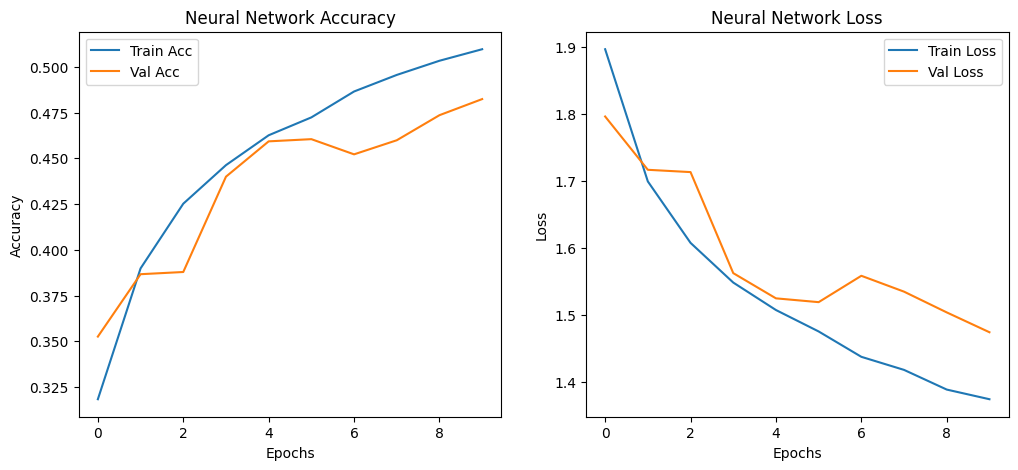

In [24]:
# -*- coding: utf-8 -*-
"""
Assignment 9: CIFAR-10 Classification
Target: Google Colab / Jupyter

Requirements:
(i)  Classify using k-Nearest Neighbors (KNN).
(ii) Classify using a 3-Layer Neural Network (Softmax classifier).
"""

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def run_cifar10_assignment():
    # ==========================================
    # 1. LOAD & PREPROCESS DATA
    # ==========================================
    print("Loading CIFAR-10 Dataset...")
    (X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Normalize pixel values to be between 0 and 1
    X_train_full = X_train_full.astype('float32') / 255.0
    X_test_full = X_test_full.astype('float32') / 255.0

    # Flatten the images for KNN (32x32x3 -> 3072 features)
    X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
    X_test_flat = X_test_full.reshape(X_test_full.shape[0], -1)

    # Flatten y (convert from 2D array to 1D array for sklearn)
    y_train_flat = y_train_full.flatten()
    y_test_flat = y_test_full.flatten()

    print(f"Original Training Shape: {X_train_full.shape}")
    print(f"Flattened Training Shape: {X_train_flat.shape}")

    # ==========================================
    # PART I: k-NEAREST NEIGHBOR (KNN)
    # ==========================================
    print("\n" + "="*40)
    print("PART I: k-NEAREST NEIGHBOR (KNN)")
    print("="*40)

    # NOTE: KNN is very slow on large datasets with high dimensionality.
    # To make this run quickly in Colab, we will use a subset of the data.
    subset_size = 5000
    print(f"Subsetting data to first {subset_size} samples for KNN speed...")

    X_train_sub = X_train_flat[:subset_size]
    y_train_sub = y_train_flat[:subset_size]
    X_test_sub = X_test_flat[:1000] # Test on 1000 samples
    y_test_sub = y_test_flat[:1000]

    # Initialize and Train KNN
    k = 3
    print(f"Training KNN (k={k})...")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_sub, y_train_sub)

    # Predict
    print("Predicting with KNN...")
    y_pred_knn = knn.predict(X_test_sub)

    # Evaluate
    acc_knn = accuracy_score(y_test_sub, y_pred_knn)
    print(f"KNN Accuracy (on subset): {acc_knn:.4f}")
    print("\nKNN Classification Report:")
    print(classification_report(y_test_sub, y_pred_knn, target_names=class_names))


    # ==========================================
    # PART II: 3-LAYER NEURAL NETWORK
    # ==========================================
    print("\n" + "="*40)
    print("PART II: 3-LAYER NEURAL NETWORK")
    print("="*40)

    # One-hot encode targets for Neural Network
    y_train_oh = to_categorical(y_train_full, 10)
    y_test_oh = to_categorical(y_test_full, 10)

    # Build Model (3 Layers: Hidden -> Hidden -> Output)
    model = Sequential([
        Input(shape=(32, 32, 3)),            # Input Layer
        Flatten(),                           # Flatten 2D image to 1D vector
        Dense(512, activation='relu'),       # Layer 1 (Hidden)
        Dense(256, activation='relu'),       # Layer 2 (Hidden)
        Dense(10, activation='softmax')      # Layer 3 (Output/Softmax Classifier)
    ])

    # Compile (Optimizer & Loss)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model Architecture:")
    model.summary()

    # Train
    print("\nTraining Neural Network...")
    history = model.fit(X_train_full, y_train_oh,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=1)

    # Evaluate
    print("\nEvaluating Neural Network on Test Set...")
    test_loss, test_acc = model.evaluate(X_test_full, y_test_oh, verbose=0)
    print(f"Neural Network Accuracy: {test_acc:.4f}")

    # ==========================================
    # VISUALIZATION
    # ==========================================
    # Plot training history
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Neural Network Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Neural Network Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    run_cifar10_assignment()